In [166]:
## major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import joblib
import warnings
warnings.filterwarnings('ignore')

## sklearn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, PolynomialFeatures,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
# detect outliers
from datasist.structdata import detect_outliers

## sklearn -- metrics
from sklearn.metrics import f1_score,precision_score, recall_score

## sklearn --Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## sklearn -- 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## other
from imblearn.over_sampling import SMOTE


### `Reading the Dataset and Look at the big picture`

In [167]:
df=pd.read_csv("loan_approval_dataset.csv").drop(columns="loan_id", axis=1)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [169]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [170]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [171]:
# the columns names starts with space so we want to rename it \
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

In [172]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [173]:
df.isna().sum().sort_values(ascending=False) 

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [174]:
df.duplicated().sum()

np.int64(0)

# EDA

In [175]:
numerical_features=df.select_dtypes(include="number").columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [176]:
numerical_features

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [177]:
caterogical_features

['education', 'self_employed', 'loan_status']

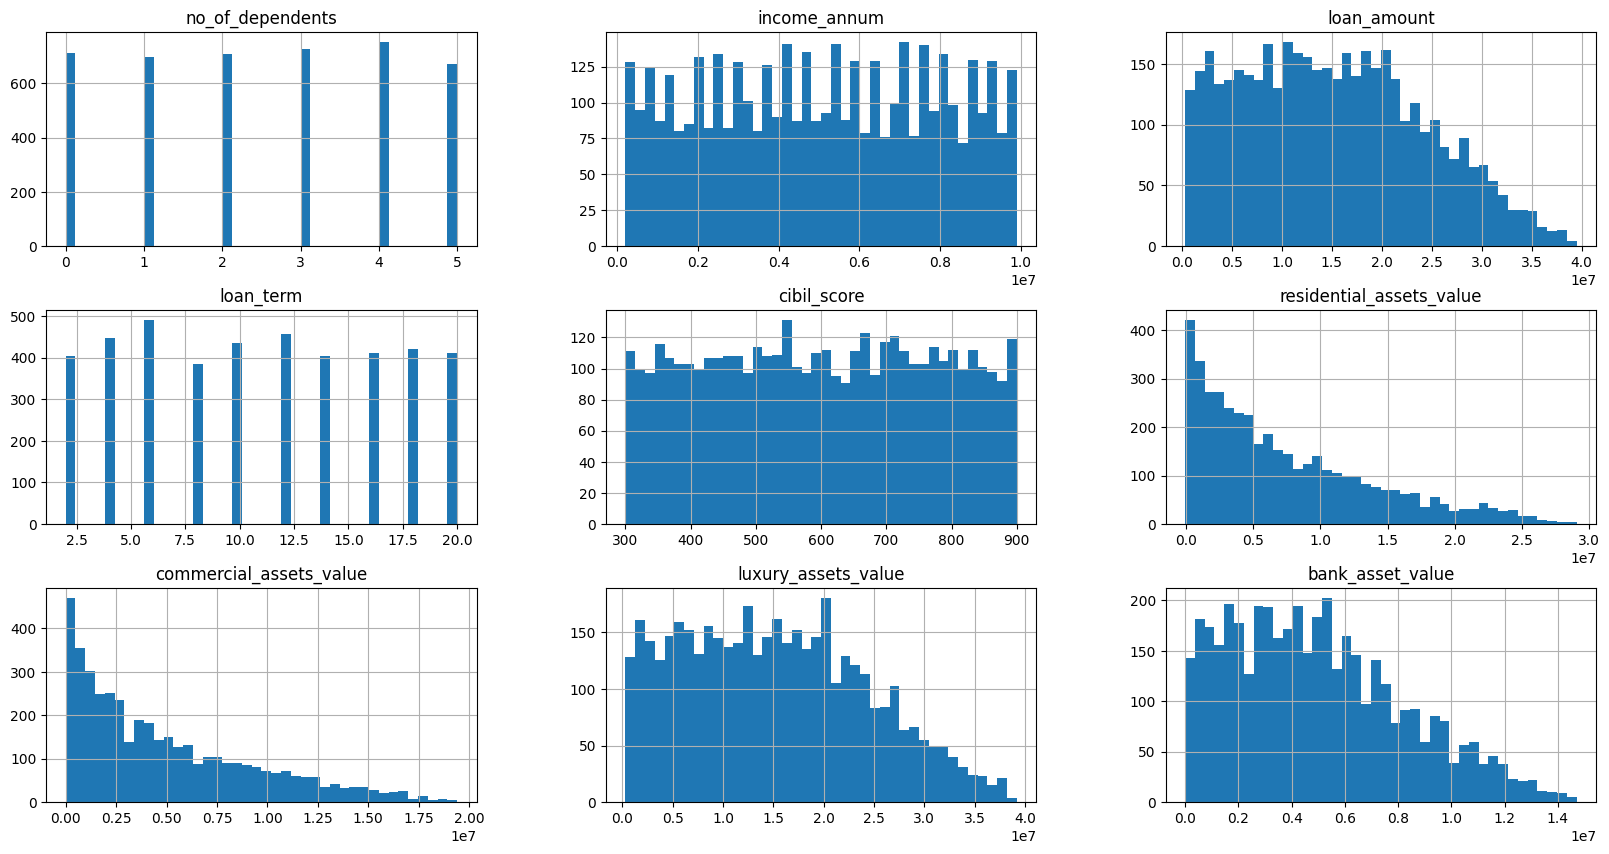

In [178]:
## Distribution for Numerical
df.hist(bins=40, figsize=(20, 10))
plt.show()

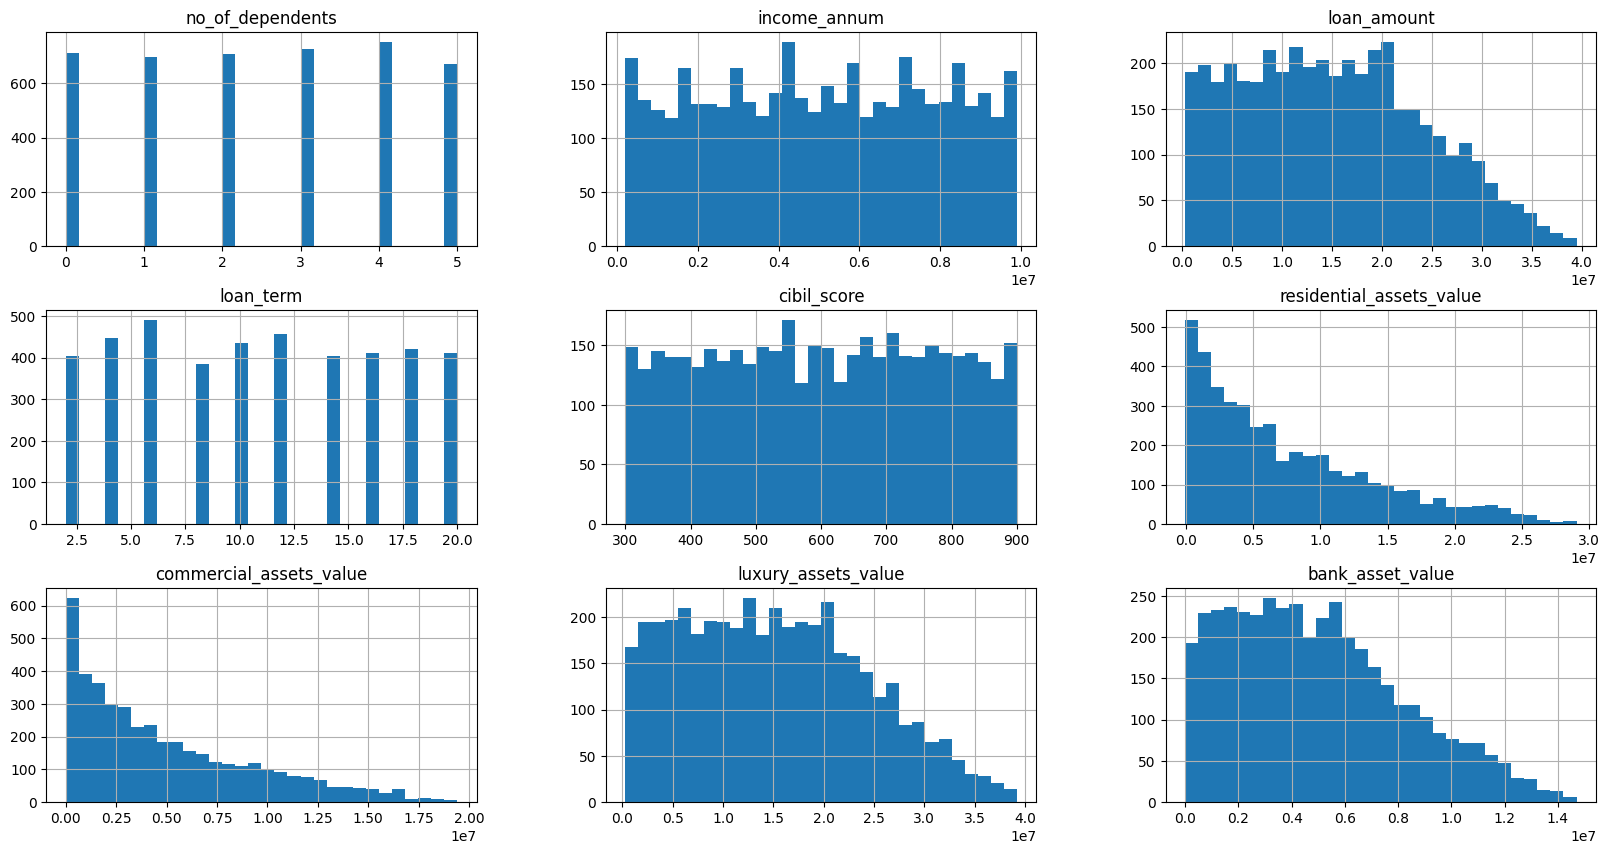

In [179]:
## Distribution for Numerical again
df.hist(bins=30, figsize=(20, 10))
plt.show()

<Axes: xlabel='education', ylabel='count'>

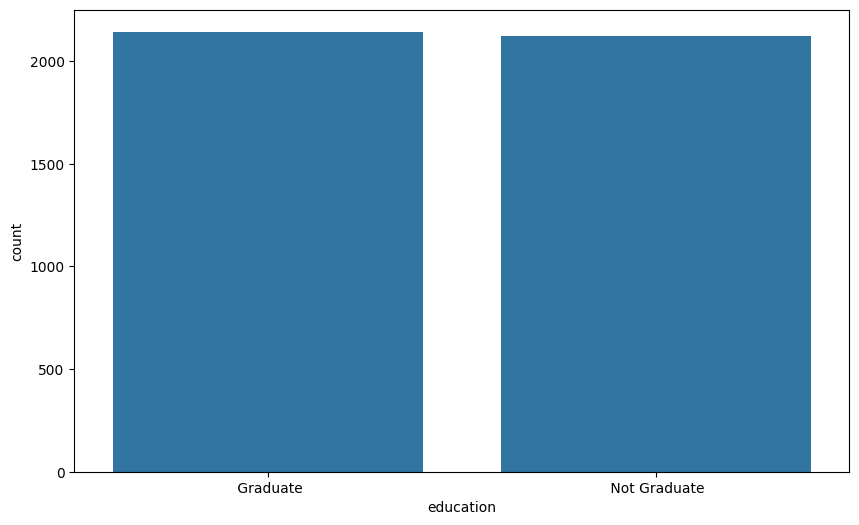

In [180]:
## Countplot for education
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index.tolist())  ## title, xlabel, ylabel, figsize

<Axes: xlabel='self_employed', ylabel='count'>

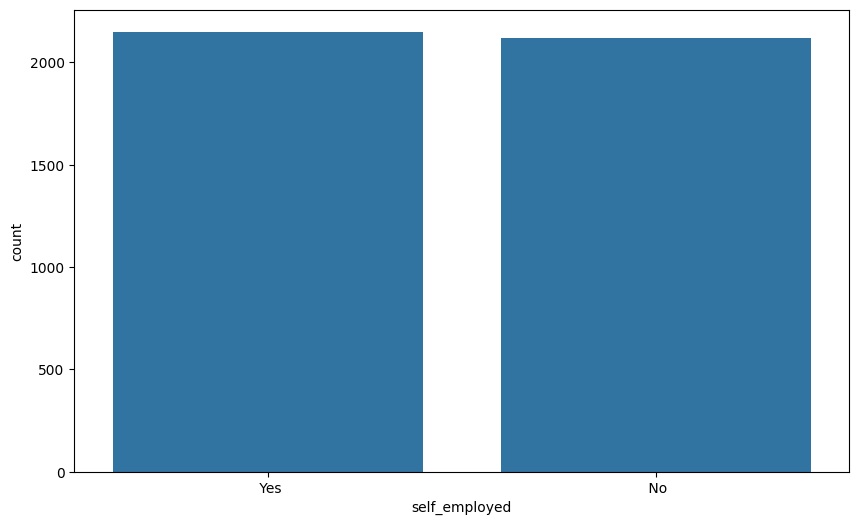

In [181]:
## Countplot for self_employed
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="self_employed", order=df['self_employed'].value_counts().index.tolist())  ## title, xlabel, ylabel, figsize

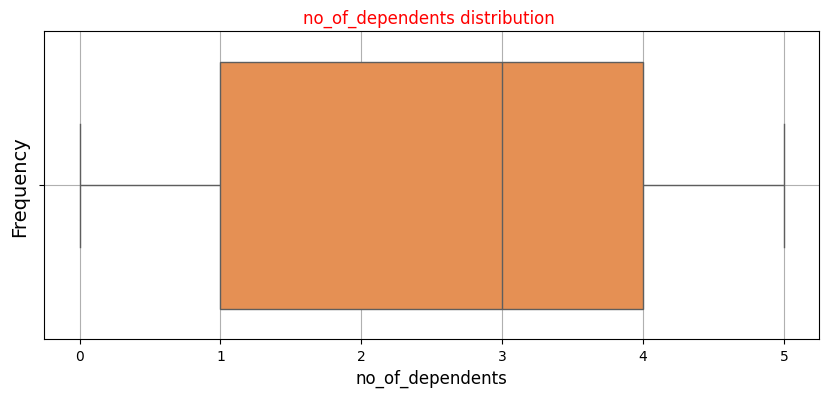

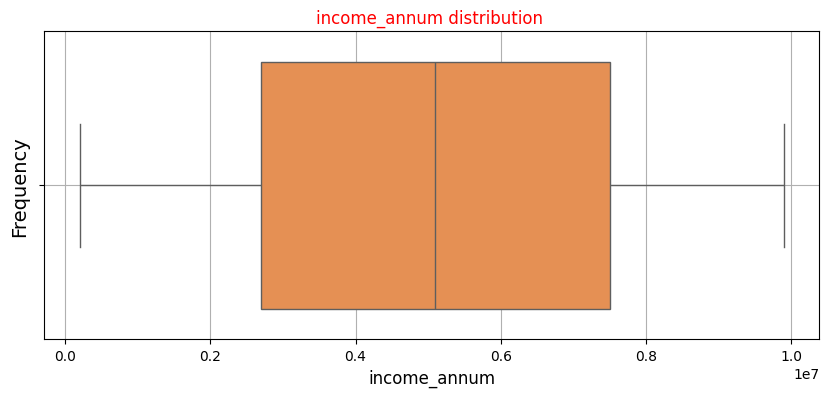

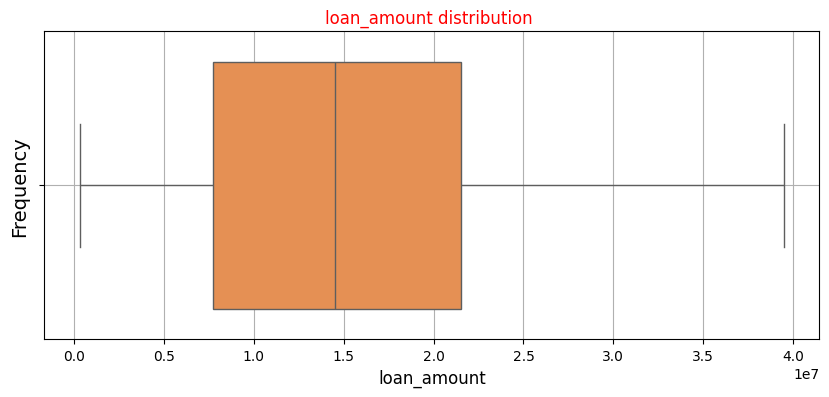

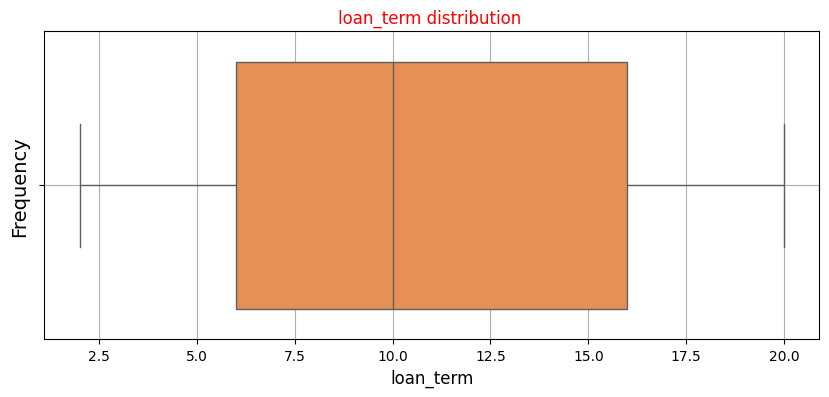

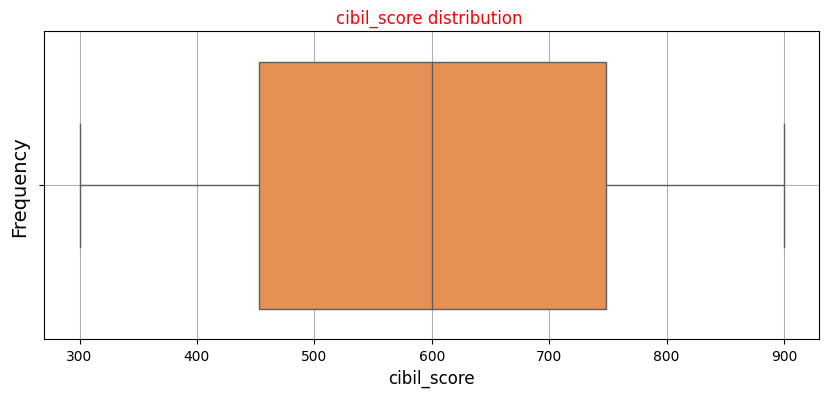

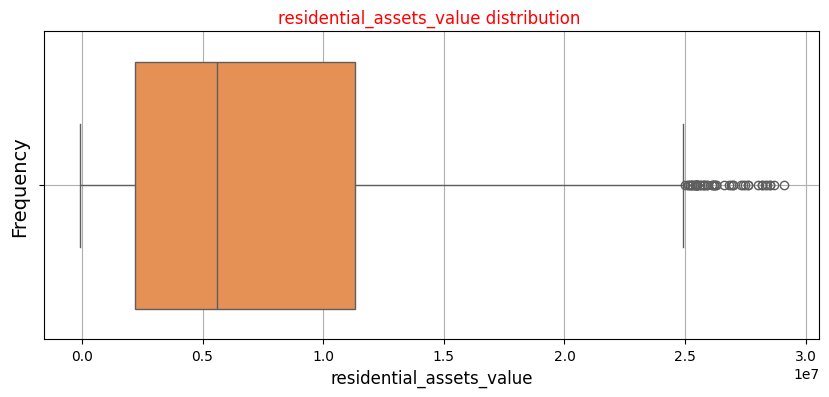

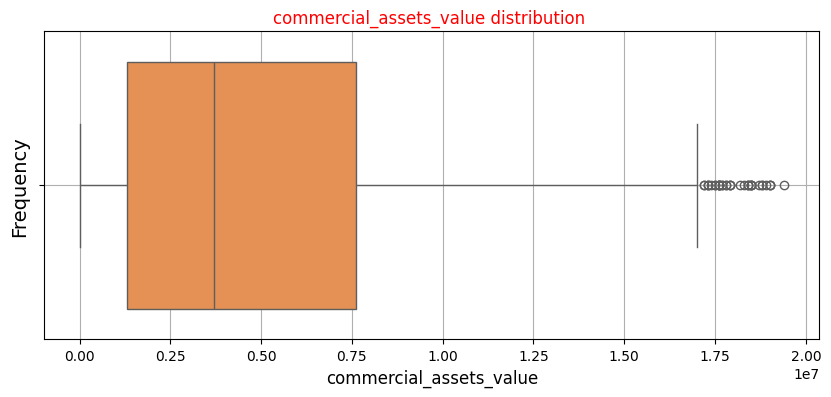

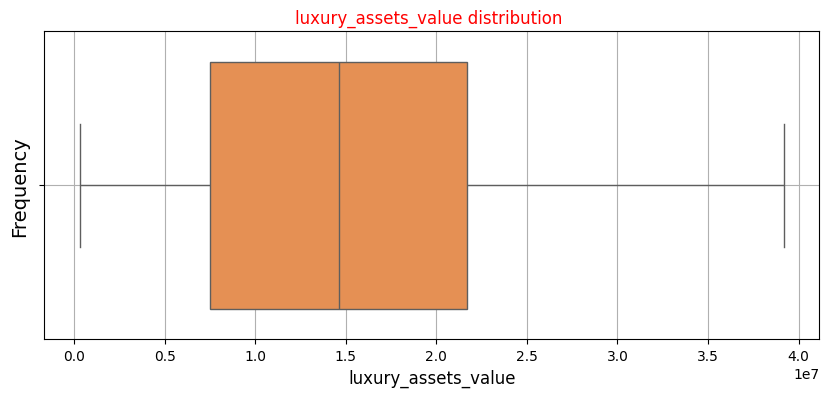

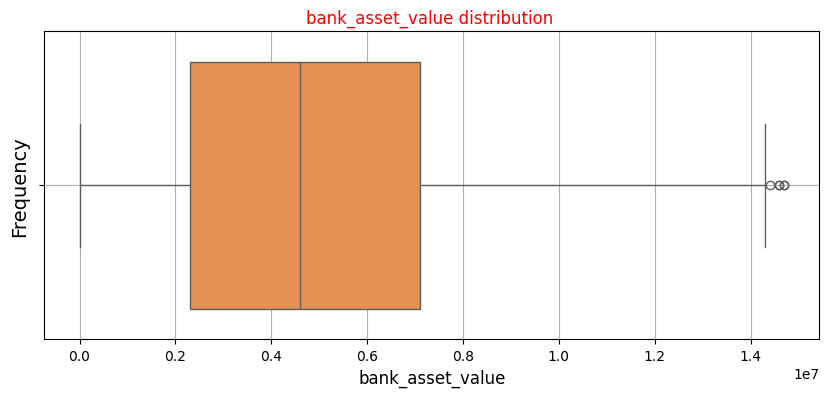

In [182]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=feature,palette="Oranges")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

In [183]:
## retrun outliers indecies
indecies_outliers = detect_outliers(data=df, n=0, features=numerical_features)
len(indecies_outliers)

91

In [184]:
## drop them all -- a strategy
df.drop(index=indecies_outliers, inplace=True, axis=0)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


<Axes: xlabel='loan_status', ylabel='count'>

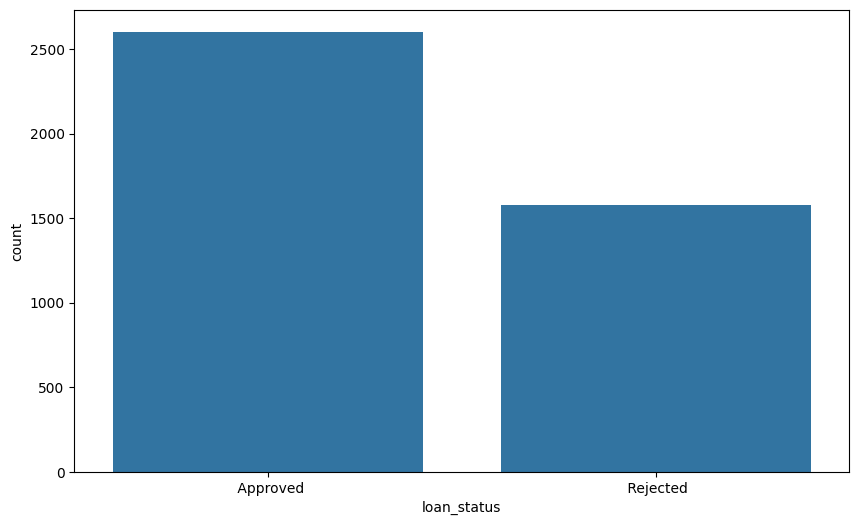

In [185]:
## Countplot for self_employed
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="loan_status", order=df['loan_status'].value_counts().index.tolist())  ## title, xlabel, ylabel, figsize

In [186]:
df["loan_status"].value_counts()

loan_status
Approved    2603
Rejected    1575
Name: count, dtype: int64

target is not balanced

# Spliting data 

In [187]:
## split to faetures and target
X = df.drop(columns=["loan_status"], axis=1)   ## faetures
y = df["loan_status"]   ## traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (2924, 11)
y_train.shape 	 (2924,)
************************************************************
X_test.shape 	 (1254, 11)
y_test.shape 	 (1254,)


# Data preprocessing 

In [188]:
## Get the Numerical and Catgeorcial columns
num_cols = X_train.select_dtypes(include='number').columns.tolist()
categ_cols = X_train.select_dtypes(exclude='number').columns.tolist()

print('Numerical cols \t', num_cols)
print('Categorical cols \t', categ_cols)

Numerical cols 	 ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical cols 	 ['education', 'self_employed']


In [189]:
categ_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(categ_cols)),
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(sparse_output=False,drop="first"))
])
num_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(num_cols)),
    ("impute",SimpleImputer(strategy="mean")),
    ("tranform",PowerTransformer(standardize=True))
])
all_pipe=FeatureUnion(transformer_list=[
    ("caterogical_pipline",categ_pipe),
    ("numerical_pipline",num_pipe)
])
X_train=all_pipe.fit_transform(X_train)
X_test=all_pipe.transform(X_test)

In [190]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [191]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.901001,1.021824,1.245263,0.584357,-0.886505,1.658044,0.755594,0.293732,1.013838
1,1.0,1.0,-0.819845,1.354609,1.118084,0.889940,0.337439,2.211308,0.977171,1.426601,0.779608
2,0.0,0.0,-1.556753,-0.239159,-0.531973,-1.222709,0.427370,-0.561635,0.590766,-0.379555,0.171312
3,1.0,1.0,-0.819845,-0.386481,-0.406927,-1.222709,-0.880392,-1.211538,-0.441355,0.085871,-0.375976
4,1.0,1.0,-0.819845,-0.423933,-0.002905,-0.069278,-0.276743,0.506518,-0.303526,-0.567402,-0.072257
...,...,...,...,...,...,...,...,...,...,...,...
2919,0.0,1.0,-0.819845,0.708895,0.845514,0.889940,0.438579,1.589162,-1.805447,0.755693,1.191348
2920,1.0,1.0,0.375679,-0.423933,-0.609562,-0.424085,1.082780,-0.211264,0.520043,-0.453325,0.257585
2921,0.0,0.0,-0.819845,-1.247326,-1.066333,-1.222709,-1.689699,-0.418113,-0.370392,-1.260948,-1.046446
2922,1.0,1.0,1.395308,-0.855926,-0.506554,0.889940,0.782675,-1.311991,-0.370392,-0.490874,-0.996841


In [192]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,-0.819845,0.317584,0.362161,-1.222709,-0.488950,-0.400520,0.707783,0.764853,-0.448936
1,1.0,1.0,0.901001,0.548143,0.480449,0.889940,-1.683136,1.630531,0.036124,0.021351,1.036475
2,1.0,0.0,0.375679,1.502403,0.671086,0.584357,-1.322128,-0.769157,0.641905,1.161150,1.058979
3,0.0,0.0,0.901001,0.740684,1.143750,1.469004,0.007410,1.930375,1.542107,1.295394,1.423307
4,0.0,1.0,1.395308,0.417230,-0.204865,-1.698827,0.190297,-0.730342,-2.537976,0.559235,-0.040615
...,...,...,...,...,...,...,...,...,...,...,...
1249,0.0,1.0,0.375679,0.803918,0.671086,-0.069278,-0.218329,-1.311991,1.510306,1.270462,1.524655
1250,1.0,0.0,0.375679,-0.239159,-0.622697,-1.698827,1.314318,0.820632,-2.537976,0.263211,-0.305207
1251,1.0,1.0,-0.191356,0.803918,0.809292,0.265541,0.252704,-1.311991,1.308831,0.096522,-0.169510
1252,1.0,1.0,1.395308,1.324802,1.066393,1.184311,1.362454,1.422433,0.348589,0.635026,0.991066


In [193]:
pd.DataFrame(y_train)

,0
0,1
1,0
2,0
3,1
4,1
...,...
2919,0
2920,0
2921,0
2922,0


In [194]:
pd.DataFrame(y_test)

,0
0,0
1,1
2,1
3,0
4,0
...,...
1249,0
1250,0
1251,0
1252,0


#### `Imbalanced Target`

In [195]:
## 1. Class weights
vals_count = 1 - (np.bincount(y_train) / len(y_train))

vals_count = vals_count / np.sum(vals_count)  ## Normalizing

dict_weights = {}
for i in range(2): ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]
dict_weights

{0: np.float64(0.3775649794801642), 1: np.float64(0.6224350205198359)}

In [196]:
## 2. SMOTE
over = SMOTE(sampling_strategy=0.7)
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)  ## for train

# Buliding Models

`1. Without taking into consideration the imbalancing of dataset`

#### 1. RF

In [197]:
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train, y_train)

## Predict 
y_pred_train_forest = forst_clf.predict(X_train)
y_pred_test_forest = forst_clf.predict(X_test)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'F1 Score for Training Dataset using RF {score_train_forest * 100 :.3f}')
print(f'F1 Score for Testing Dataset using RF {score_test_forest * 100 :.3f}')

F1 Score for Training Dataset using RF 96.860
F1 Score for Testing Dataset using RF 95.189


In [198]:
precision_score(y_train, y_pred_train_forest), recall_score(y_train, y_pred_train_forest), f1_score(y_train, y_pred_train_forest)

(0.9464131374243734, 0.9918478260869565, 0.9685979655019903)

2. SVM

In [199]:
svc_clf_svm = SVC(C=2, kernel='rbf', gamma=0.1,probability=True)
svc_clf_svm.fit(X_train, y_train) 

## Predict
y_pred_train_svm = svc_clf_svm.predict(X_train)
y_pred_test_svm = svc_clf_svm.predict(X_test)

## Evaluate using f1 score
score_train_svm = f1_score(y_train, y_pred_train_svm)
score_test_svm = f1_score(y_test, y_pred_test_svm)

print(f'F1 Score for Training Dataset using SVC {score_train_svm * 100 :.3f}')
print(f'F1 Score for Testing Dataset using SVC {score_test_svm * 100 :.3f}')

F1 Score for Training Dataset using SVC 95.621
F1 Score for Testing Dataset using SVC 92.437


In [200]:
precision_score(y_train, y_pred_train_svm), recall_score(y_train, y_pred_train_svm), f1_score(y_train, y_pred_train_svm)

(0.9531953195319532, 0.9592391304347826, 0.9562076749435666)

So the best model here is random forest

# Bonus

2. with take into consideration the imbalancing using (class_weights)

In [201]:
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)
forst_clf.fit(X_train, y_train)

## Predict
y_pred_train_forest = forst_clf.predict(X_train)
y_pred_test_forest = forst_clf.predict(X_test)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'F1 Score for Training Dataset using RF using class_weights {score_train_forest * 100 :.3f}')
print(f'F1 Score for Testing Dataset using RF using class_weights {score_test_forest * 100 :.3f}')

F1 Score for Training Dataset using RF using class_weights 96.352
F1 Score for Testing Dataset using RF using class_weights 94.630


In [202]:
precision_score(y_train, y_pred_train_forest), recall_score(y_train, y_pred_train_forest), f1_score(y_train, y_pred_train_forest)

(0.9359521776259607, 0.9927536231884058, 0.9635164835164836)

In [203]:
svc_clf_rbf = SVC(C=2, kernel='rbf', gamma=0.1, class_weight=dict_weights, probability=True)
svc_clf_rbf.fit(X_train, y_train)

## Predict
y_pred_train_rbf = svc_clf_rbf.predict(X_train)
y_pred_test_rbf = svc_clf_rbf.predict(X_test)

## Evaluate using f1 score
score_train_rbf = f1_score(y_train, y_pred_train_rbf)
score_test_rbf = f1_score(y_test, y_pred_test_rbf)

print(f'F1 Score for Training Dataset using SVC with RBF kernel with class_weights {score_train_rbf * 100 :.3f}')
print(f'F1 Score for Testing Dataset using SVC with RBF kernel with class_weights {score_test_rbf * 100 :.3f}')

F1 Score for Training Dataset using SVC with RBF kernel with class_weights 93.553
F1 Score for Testing Dataset using SVC with RBF kernel with class_weights 90.669


In [204]:
precision_score(y_train, y_pred_train_svm), recall_score(y_train, y_pred_train_svm), f1_score(y_train, y_pred_train_svm)

(0.9531953195319532, 0.9592391304347826, 0.9562076749435666)

So the best model here is random forest with class weights

3. with take into consideration the imbalancing using (over sampled using SMOTE)

In [205]:
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train_resampled, y_train_resampled)

## Predict
y_pred_train_forest = forst_clf.predict(X_train)
y_pred_test_forest = forst_clf.predict(X_test)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'F1 Score for Training Dataset using RF after SMOTE {score_train_forest * 100 :.3f}')
print(f'F1 Score for Testing Dataset using RF after SMOTE {score_test_forest * 100 :.3f}')

F1 Score for Training Dataset using RF after SMOTE 96.646
F1 Score for Testing Dataset using RF after SMOTE 94.812


In [206]:
precision_score(y_train, y_pred_train_forest), recall_score(y_train, y_pred_train_forest), f1_score(y_train, y_pred_train_forest)

(0.9423407917383821, 0.9918478260869565, 0.9664607237422771)

In [207]:
svc_clf_rbf = SVC(C=2, kernel='rbf', gamma=0.1,probability=True)
svc_clf_rbf.fit(X_train_resampled, y_train_resampled) 

## Predict
y_pred_train_rbf = svc_clf_rbf.predict(X_train)
y_pred_test_rbf = svc_clf_rbf.predict(X_test)

## Evaluate using f1 score
score_train_rbf = f1_score(y_train, y_pred_train_rbf)
score_test_rbf = f1_score(y_test, y_pred_test_rbf)

print(f'F1 Score for Training Dataset using SVC with RBF kernel after SMOTE {score_train_rbf * 100 :.3f}')
print(f'F1 Score for Testing Dataset using SVC with RBF kernel with after SMOTE {score_test_rbf * 100 :.3f}')

F1 Score for Training Dataset using SVC with RBF kernel after SMOTE 96.018
F1 Score for Testing Dataset using SVC with RBF kernel with after SMOTE 92.356


In [208]:
precision_score(y_train, y_pred_train_svm), recall_score(y_train, y_pred_train_svm), f1_score(y_train, y_pred_train_svm)

(0.9531953195319532, 0.9592391304347826, 0.9562076749435666)

So the best model here is random forest with smote

Logistic Regression

In [209]:
## Using Logistic Reg Without taking into cosideration class_weights
log_clf = LogisticRegression(penalty=None,max_iter=10000, multi_class='auto')
log_clf.fit(X_train, y_train) 

## Predict
y_pred_train_log = log_clf.predict(X_train)
y_pred_test_log = log_clf.predict(X_test)

## Evaluate
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'F1 Score for Training Dataset using Logisitic {score_train_log * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Logisitic {score_test_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic 89.315
F1 Score for Testing Dataset using Logisitic 88.627


In [210]:
precision_score(y_train, y_pred_train_log), recall_score(y_train, y_pred_train_log), f1_score(y_train, y_pred_train_log)

(0.9005524861878453, 0.8858695652173914, 0.8931506849315068)

In [211]:
## Using Logistic Reg taking into cosideration class_weights
log_clf = LogisticRegression(penalty=None, class_weight=dict_weights,max_iter=10000, multi_class='auto')
log_clf.fit(X_train, y_train)

## Predict
y_pred_train_log = log_clf.predict(X_train)
y_pred_test_log = log_clf.predict(X_test)

## Evaluate
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'F1 Score for Training Dataset using Logisitic with class_weights {score_train_log * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Logisitic after class_weights {score_test_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic with class_weights 90.609
F1 Score for Testing Dataset using Logisitic after class_weights 89.592


In [212]:
precision_score(y_train, y_pred_train_log), recall_score(y_train, y_pred_train_log), f1_score(y_train, y_pred_train_log)

(0.8712374581939799, 0.9438405797101449, 0.9060869565217391)

In [213]:
## Using Logistic Reg taking into cosideration SMOTE
log_clf = LogisticRegression(penalty=None, max_iter=10000, multi_class='auto')
log_clf.fit(X_train_resampled, y_train_resampled)  ## USING Smote

## Predict
y_pred_train_log = log_clf.predict(X_train)
y_pred_test_log = log_clf.predict(X_test)

## Evaluate
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'F1 Score for Training Dataset using Logisitic with SMOTE {score_train_log * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Logisitic after SMOTE {score_test_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic with SMOTE 89.761
F1 Score for Testing Dataset using Logisitic after SMOTE 89.195


In [214]:
precision_score(y_train, y_pred_train_log), recall_score(y_train, y_pred_train_log), f1_score(y_train, y_pred_train_log)

(0.8939802336028752, 0.9012681159420289, 0.8976093820478124)

* Decision Trees

In [215]:
## Using DT Without taking into cosideration class_weights
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='best', max_leaf_nodes=10)
tree_clf.fit(X_train, y_train)

# Predict
y_pred_train_tree = tree_clf.predict(X_train)
y_pred_test_tree = tree_clf.predict(X_test)

## Evaluate
score_train_tree = f1_score(y_train, y_pred_train_tree)
score_test_tree = f1_score(y_test, y_pred_test_tree)

print(f'F1 Score for Training Dataset using Decision Trees {score_train_tree * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Decision Trees {score_test_tree * 100 :.3f}')

F1 Score for Training Dataset using Decision Trees 96.594
F1 Score for Testing Dataset using Decision Trees 95.885


In [216]:
precision_score(y_train, y_pred_train_tree), recall_score(y_train, y_pred_train_tree), f1_score(y_train, y_pred_train_tree)

(0.9438202247191011, 0.9891304347826086, 0.9659442724458205)

In [217]:
## Using DT taking into cosideration class_weights
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='best', max_leaf_nodes=10,class_weight=dict_weights)
tree_clf.fit(X_train, y_train)

# Predict
y_pred_train_tree = tree_clf.predict(X_train)
y_pred_test_tree = tree_clf.predict(X_test)

## Evaluate
score_train_tree = f1_score(y_train, y_pred_train_tree)
score_test_tree = f1_score(y_test, y_pred_test_tree)

print(f'F1 Score for Training Dataset using Decision Trees with class_weights {score_train_tree * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Decision Trees after class_weights {score_test_tree * 100 :.3f}')

F1 Score for Training Dataset using Decision Trees with class_weights 96.515
F1 Score for Testing Dataset using Decision Trees after class_weights 95.688


In [218]:
precision_score(y_train, y_pred_train_tree), recall_score(y_train, y_pred_train_tree), f1_score(y_train, y_pred_train_tree)

(0.94067067927773, 0.9909420289855072, 0.9651521835024262)

In [219]:
## DT using SMOTE
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='best', max_leaf_nodes=10)
tree_clf.fit(X_train_resampled, y_train_resampled)  ## using SMOTE

# Predict and evaluate 
y_pred_train_tree = tree_clf.predict(X_train)
y_pred_test_tree = tree_clf.predict(X_test)

## Evaluate
score_train_tree = f1_score(y_train, y_pred_train_tree)
score_test_tree = f1_score(y_test, y_pred_test_tree)

print(f'F1 Score for Training Dataset using Decision Trees with SMOTE {score_train_tree * 100 :.3f}')
print(f'F1 Score for Testing Dataset using Decision Trees with SMOTE {score_test_tree * 100 :.3f}')

F1 Score for Training Dataset using Decision Trees with SMOTE 96.594
F1 Score for Testing Dataset using Decision Trees with SMOTE 95.885


In [220]:
precision_score(y_train, y_pred_train_tree), recall_score(y_train, y_pred_train_tree), f1_score(y_train, y_pred_train_tree)

(0.9438202247191011, 0.9891304347826086, 0.9659442724458205)

So the best model here is simple DT and DT with smote

Best models

In [221]:
joblib.dump(tree_clf, 'Simple RF_model.pkl') 

['Simple RF_model.pkl']

In [222]:
joblib.dump(tree_clf, 'RF_Smote.pkl') 

['RF_Smote.pkl']